### <Center> Лабораторна робота №8. <br> Вивчення метрик якості класифікації

Розглянемо основні метрики якості класифікації.

[Публікація](https://towardsdatascience.com/the-5-classification-evaluation-metrics-you-must-know-aa97784ff226) на towardsdatascience.com на дану тему. 

**Спочатку налаштуємо доступ до даних на google drive (якщо ви відкриваєте блокнот в google colab, а не на PC) шляхом монтування google drive**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


Перевіримо шлях до папки з матеріалами лаборатоної роботи на google drive. Якщо у вас шлях відрізняється то відредагуйте

In [2]:
!ls gdrive/'My Drive'/TEACHING/IntroDataScience/intro_to_data_science/Lab_7_8/

data
img
lab7_credit_scoring_random_forest.ipynb
lab7_credit_scoring_random_forest..pdf
lab8_quality_metrics_classification.ipynb


Перемістимо матеріали лабораторної роботи з google drive на віртуальну машину google colab

In [3]:
!cp -a gdrive/'My Drive'/TEACHING/IntroDataScience/intro_to_data_science/Lab_7_8/. .
!ls

data	lab7_credit_scoring_random_forest.ipynb    sample_data
gdrive	lab7_credit_scoring_random_forest.pdf
img	lab8_quality_metrics_classification.ipynb


### Матриця помилок 
Існує безліч різних числових характеристик, що дозволяють виміряти якість бінарного класифікатора. У випадку двох класів можливі всього 4 результати під час класифікації даного об'єкта. Їх зручно відображати за допомогою матриці помилок (confusion matrix). Це таблиця з двома рядками і двома стовпцями, у комірках якої вказано наступні значення:
- $TP$ = кількість правильно класифікованих позитивних прикладів
- $FP$ = кількість негативних прикладів, що класифіковано як позитивні (помилки першого роду)
- $TN$ = кількість правильно класифікованих негативних прикладів
- $FN$ = кількість позитивних прикладів, що класифіковано як негативні (помилки другого роду)



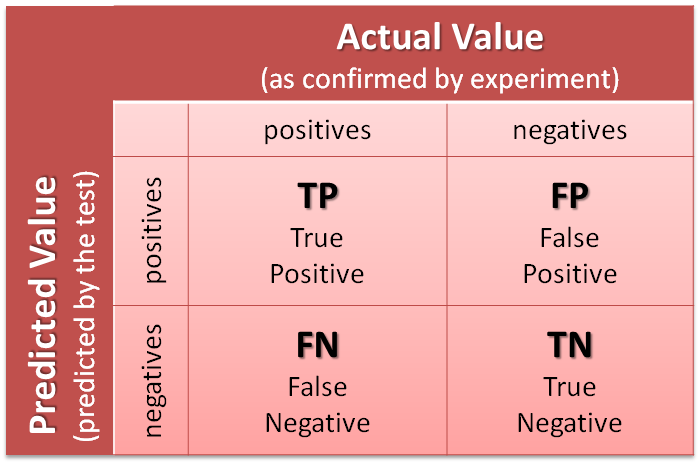

In [1]:
from IPython.display import Image
Image("img/contingency.png")

Отримати таку таблицю можна за допомогою функції sklearn.metrics.confusion_matrix шляхом передавання їй на вхід істинних і прогнозованих класифікатором міток.

In [2]:
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn import metrics

true_labels = np.array([0, 1, 0, 0, 1, 1, 1, 1])
predicted_labels = np.array([0, 1, 1, 0, 0, 1, 0, 0])

M = metrics.confusion_matrix(true_labels, predicted_labels)
M

array([[2, 1],
       [3, 2]], dtype=int64)

### Характеристики бінарного класифікатора
На основі даної таблиці можна ввести декілька величин, що характеризують бінарний класифікатор:
$$rec = TPR = \frac{TP}{TP + FN},\quad SPC = \frac{TN}{TN + FP},\quad prec = PPV = \frac{TP}{TP + FP},\quad FPR = 1 - SPC,$$

$$ACC = \frac{TP + TN}{TP + TN + FP + FN},\quad F1 = 2\frac{PPV\cdot TRP}{PPV + TPR}.$$

Повнота $TPR$ (True positive rate, recall, sensitivity) - частка правильно класифікованих позитивних прикладів серед всіх позитивних прикладів.

Специфічність $SPC$ (Specificity, true negative rate) - частка правильно класифікованих негативних прикладів серед всіх від'ємних прикладів.

Точність $PPV$ (Positive predictive value, precision) - частка правильно класифікованих позитивних прикладів серед всіх прикладів, що класифіковані позитивно.

$FPR$ (False positive rate) - частка помилково класифікованих від'ємних приклади серед всіх від'ємних прикладів.

$ACC$ (Accuracy) - частка правильно класифікованих прикладів серед всіх прикладів. Основна характеристика якості класифікації.

$F1$ (F1-measure) - середнє гармонічне точності і повноти. Дозволяє врахувати обидві характеристики одночасно.

In [3]:
PPV = metrics.precision_score(true_labels, predicted_labels)
TPR = metrics.recall_score(true_labels, predicted_labels)
F1 = metrics.f1_score(true_labels, predicted_labels)
ACC = metrics.accuracy_score(true_labels, predicted_labels)
PPV, TPR, F1, ACC

(0.6666666666666666, 0.4, 0.5, 0.5)

### ROC-крива і AUC

Більшість бінарних класифікаторів мають вигляд $a(x) = \mbox{sign}(f(x, w) - w_0)$, де $w, w_0$ - параметри алгоритму. Тобто спочатку будується роздільна поверхня $f(x, w) = w_0$, після чого об'єкти, що знаходяться по одну сторону від неї класифікуються позитивно, по іншу - негативно.

ROC-крива (Receiver Operating Characteristic) - це графічна характеристика якості бінарного класифікатора, що виражає залежність TPR від FPR при варіюванні порогу вирішального правила. Вона наочно представляє, якою буде якість класифікації при різних значеннях $w_0$ і фіксованому значенні $w$.

ROC-крива проходить через точки (0, 0) і (1, 1) і монотонно не убуває. Чим ближче крива всередині квадрата $[0, 1]\times[0, 1]$ до лівого верхнього кута, тим краще. Ідеальний варіант - крива, що проходить через три точки: (0, 0), (1, 1) і (0, 1). Діагональ даного квадрату відповідає випадковому вгадуванню. Типова ROC-крива для класифікатора відповідає кривій наступного рисунку.


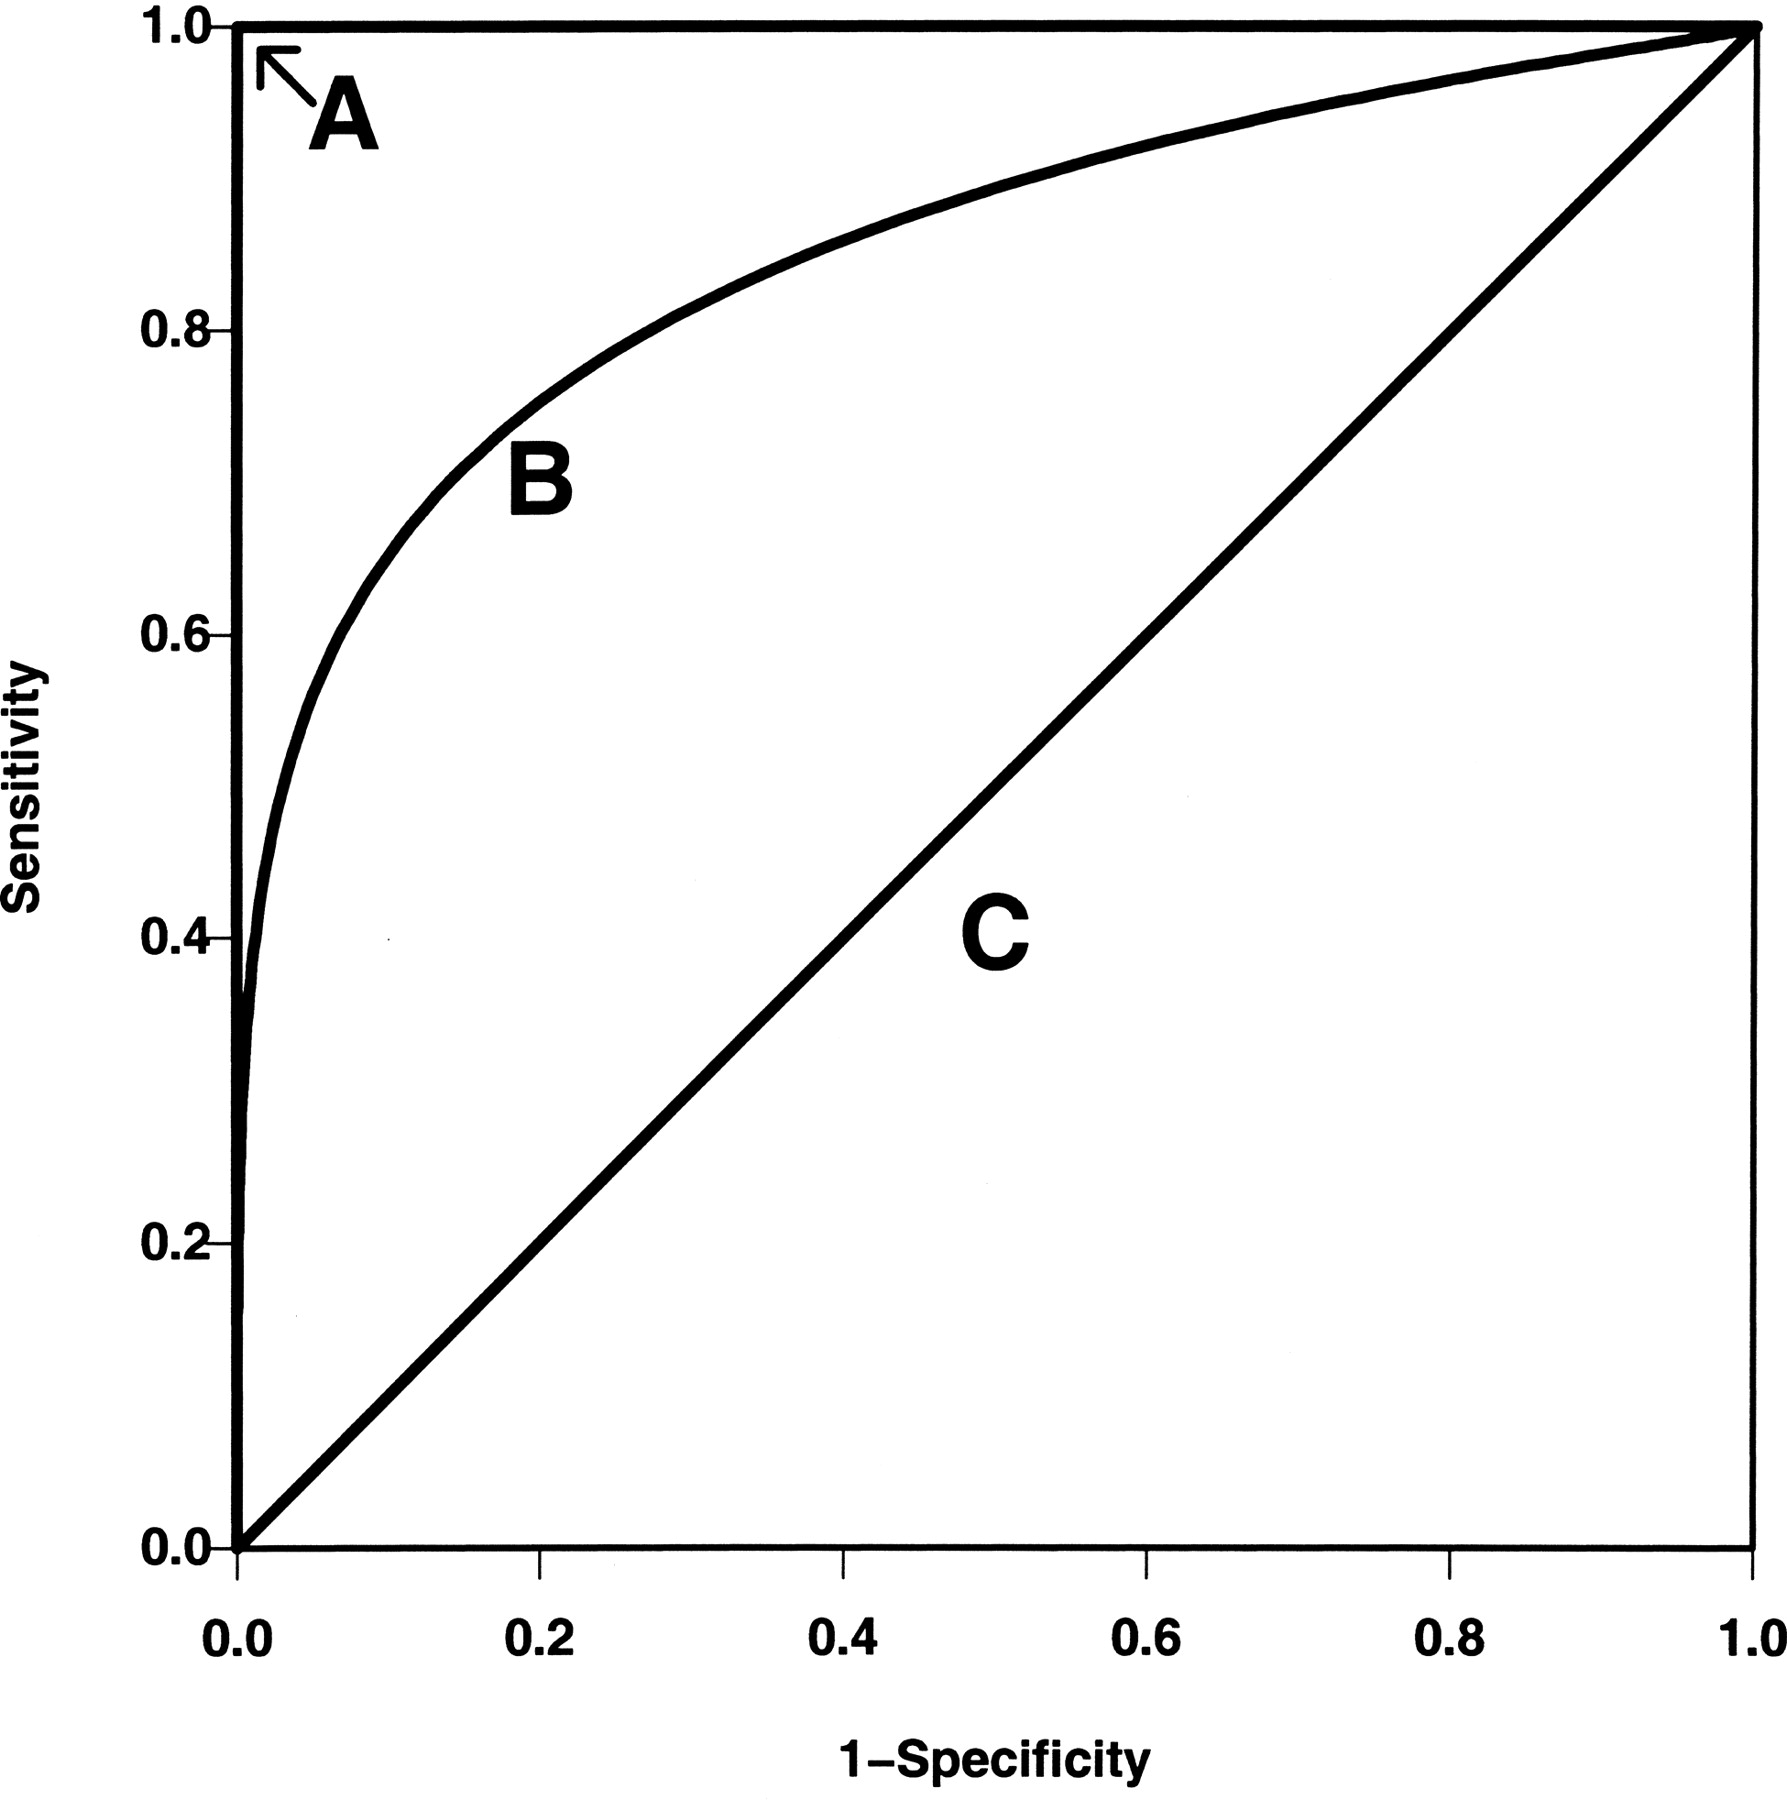

In [4]:
from IPython.display import Image
Image("img/ROC.jpg", width=640, height=480)

На практиці ROC-криву завжди оцінюють на незалежній тестовій вибірці, для того, щоб уникнути перенавчання.

Площа під ROC-кривою AUC (Area Under Curve) є кількісною характеристикою якості класифікації, що не залежить від співвідношення цін помилок. Чим більше значення AUC, тим «краще» модель класифікації.

### Випадок дизбалансу класів

Можливі [дії](http://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/):

- Зібрати більше даних, особливо прикладів рідкісного класу (не завжди можливо)
- Використовувати методи, засновані на деревах рішень - випадковий ліс, градієнтний бустінг над деревами. Дерева не так схильні до проблеми дисбалансу класів
- Використовувати метрики типу F1, ROC AUC і [Cohen's kappa] (https://en.wikipedia.org/wiki/Cohen%27s_kappa), а не accuracy
- Використовувати метрику, в якій помилка на об'єкті з рідкісного класу входить з великою вагою, ніж помилка на об'єкті з частого класу
- Застосовувати [oversampling] (https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis) і [undersampling] (https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis). У першому випадку в вибірку додаються представники рідкісного класу (семпліруются з заміщенням). У другому - представники частого класу випадковим чином видаляються з вибірки
- Згенерувати штучні представники рідкісного класу. [SMOTE] (http://www.jair.org/papers/paper953.html) (Synthetic Minority Over-sampling Technique). [Реалізація] (https://github.com/fmfn/UnbalancedDataset) на Python
- Розбити один великий клас на кілька поменше і застосувати стратегії One Vs. All або One Vs. One
- Застосувати алгоритм пошуку викидів або OneClass алгоритми (наприклад, OneClass SVM)

## Приклади

In [5]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import sys
if sys.version_info.major == 2:
    from urllib import urlopen
elif sys.version_info.major == 3:
    from urllib.request import urlopen
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc
import pandas as pd
from matplotlib import pyplot as plt

D:\ANKND\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


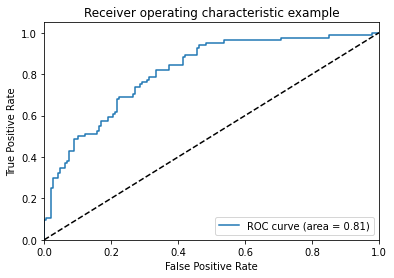

In [7]:
data = pd.read_csv('data/pima-indians-diabetes.csv')

y = data.iloc[:,-1:].to_numpy().tolist()
X = data.iloc[:,:-1].to_numpy().tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
C = 10.0 # Regularization parameter of the error term

lin_svm = LinearSVC(C=C, dual=False).fit(X_train, y_train)
y_score = lin_svm.decision_function(X_test)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Завдання 1:
* напишіть код оптимізації параметра регуляризації для максимізації площі ROC-кривої
* напишіть код оптимізації порогу 

In [11]:
from sklearn.model_selection import GridSearchCV

def params_optimizing(params):
    linear_svm_model = LinearSVC(dual=False)
    linear_smv_model_tuned = GridSearchCV(linear_svm_model, params, scoring="roc_auc", n_jobs=-1)
    linear_smv_model_tuned.fit(X_train, np.array(y_train).ravel())
    print(f"Best params are {linear_smv_model_tuned.best_params_}")
    print(f"Best auc_roc score is {linear_smv_model_tuned.best_score_}")

In [12]:
c_param = {"C": np.logspace (-3, 1, 10)}
params_optimizing(c_param)

Best params are {'C': 3.593813663804626}
Best auc_roc score is 0.8315795674950606


In [13]:
threshold_param = {"class_weight": [{0: i, 1: 1 - i} for i in np.linspace(0, 1, 15)]}
params_optimizing(threshold_param)

Best params are {'class_weight': {0: 0.2857142857142857, 1: 0.7142857142857143}}
Best auc_roc score is 0.8321705609029554


Вказані вище характеристики можна використовувати для підбору параметрів алгоритмів, наприклад, за допомогою крос-валідації. Знайдемо оптимальне з точки зору F1-міри кількість найближчих сусідів в алгоритмі kNN.

D:\ANKND\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ANKND\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ANKND\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ANKND\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\A

D:\ANKND\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ANKND\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ANKND\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ANKND\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\A

D:\ANKND\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ANKND\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ANKND\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ANKND\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\A

D:\ANKND\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ANKND\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ANKND\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ANKND\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\A

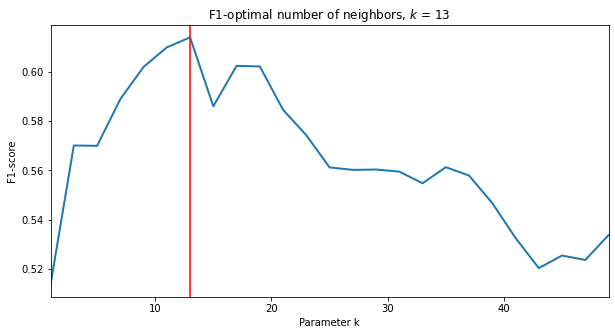

In [14]:
knn = KNeighborsClassifier()
k_s = np.arange(1, 50, 2)

scores_f1 = list()

for k in k_s:
    knn.n_neighbors = k
    scores_f1.append(np.mean(
            cross_val_score(knn, X, y, scoring = 'f1')))

plt.figure(1, figsize=(10, 5))
plt.clf()
plt.plot(k_s, scores_f1, linewidth = 2)
plt.axvline(k_s[np.argmax(scores_f1)], color = 'r')
plt.ylabel('F1-score')
plt.xlabel('Parameter k')
plt.xlim(1, 49)
plt.title('F1-optimal number of neighbors, $k$ = %d' % 
          k_s[np.argmax(scores_f1)])
plt.show()

### Завдання 2:
напишіть код оптимізації параметра k таким чином, щоб False Positive Rate не перевищував 0.1

### Багатокласова класифікація
У випадку, коли кількість класів більша двох, матриця помилок визначається аналогічним чином: на перетині $i$-го рядка і $j$-го стовбця стоїть число прикладів $i$-го класу, віднесених класифікатором до класу $j$. 

In [15]:
true_labels = np.array([0, 1, 2, 0, 1, 2, 0, 1, 2])
predicted_labels = np.array([0, 2, 0, 2, 1, 0, 0, 1, 2])

M = metrics.confusion_matrix(true_labels, predicted_labels)
M

array([[2, 0, 1],
       [0, 2, 1],
       [2, 0, 1]], dtype=int64)

### One vs. All
Багатокласова класифікація може бути зведена до бінарної різноманітними способами. Одним з них є підхід One vs. All. Його суть в наступному: для кожного класу $i \in \{1, \dots, k\}$ навчаємо бінарний класифікатор $a_i(x) = \mbox{sign}f_i(x)$ на вхідній вибірці зі зміненими мітками (об'єкти $i$-го класу отримують мітку 1, вся решта об'єктів - мітку 0), тобто ми вчимо $a_i$ відрізняти $i$-ий клас від всієї решти. Після чого результивний класифікатор будується як $a(x) = \mbox{argmax}_{i \in \{1, \dots, k\}} f_i(x)$, тобто він видає клас з найбільшою оцінкою $f_i(x)$. 

In [16]:
iris = datasets.load_iris()
X, y = iris.data, iris.target
# Fitting One vs. All version of linear SVM
onevsall = OneVsRestClassifier(LinearSVC()).fit(X, y) 
metrics.accuracy_score(y, onevsall.predict(X))

D:\ANKND\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
D:\ANKND\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.9666666666666667